<a href="https://colab.research.google.com/github/datxander/Back-to-basics/blob/main/Statistics_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link:](https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb)


Subjects covered : Estimates of location, variability, percentiles & boxplots, Frequency tables & histograms, Density estimates

In [2]:
!pip install wquantiles

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import warnings
warnings.filterwarnings('ignore')


In [5]:
state = pd.read_csv('/content/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
# Location estimates

# Mean
print(state.Population.mean())

6162876.3


In [7]:
# Trimmed mean
print(trim_mean(state.Population, 0.05))

5316411.543478261


In [8]:
# Median
state.Population.median()

4436369.5

In [10]:
# Weighted mean with numpy

state['Murder.Rate'].mean()  # Regular mean

4.066

In [11]:
np.average(state['Murder.Rate'], weights = state['Population']) # Weighted median

4.445833981123393

In [12]:
print(wquantiles.median(state['Murder.Rate'], weights = state['Population'])) # Weighted median

4.4


In [13]:
# Variability estimates

#Std. deviation

print(state['Population'].std())


6848235.347401142


In [14]:
#IQR:

state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [16]:
# Median absolute deviation

robust.scale.mad(state['Population'])




3849876.1459979336

[When to use the Median Absolute Deviation](https://www.google.com/search?q=when+is+it+a+good+time+to+check+median+absolute+deviation&oq=when+is+it+a+good+time+to+check+median+absol&gs_lcrp=EgZjaHJvbWUqBwgCECEYoAEyBggAEEUYOTIHCAEQIRigATIHCAIQIRigATIHCAMQIRigATIHCAQQIRigAdIBCDk4ODlqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8)

In [17]:
# Percentiles and Boxplots

print(state['Murder.Rate'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]))

0.05    1.600
0.10    1.890
0.25    2.425
0.50    4.000
0.75    5.550
0.90    6.010
0.95    6.510
Name: Murder.Rate, dtype: float64


In [18]:
percentages = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))

df.index = [f'{p*100}%' for p in percentages]
df

,Murder.Rate
5.0%,1.600
10.0%,1.890
25.0%,2.425
50.0%,4.000
75.0%,5.550
90.0%,6.010
95.0%,6.510


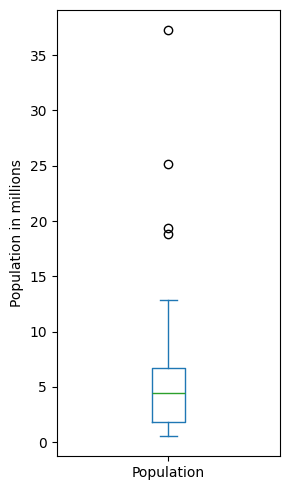

In [20]:
ax = (state['Population']/1000000).plot.box(figsize = (3,5))
ax.set_ylabel('Population in millions')

plt.tight_layout()
plt.show()